In [3]:
# pip install the libraries using below code
!pip install pandas
!pip install kaggle

# import the pandas library
import pandas as pd

# import zipfile library (we will use this to extract the file downloaded from Kaggle)
import zipfile

# import kaggle library (we will use this to download the dataset programatically from Kaggle)
import kaggle

Documentation on how to use the Kaggle API
https://www.kaggle.com/docs/api

In [4]:
# Dataset download from kaggle using the Kaggle API. 
# Documentation on how to use the Kaggle API https://www.kaggle.com/docs/api

!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset


  0%|          | 0.00/165k [00:00<?, ?B/s]
100%|##########| 165k/165k [00:00<00:00, 994kB/s]
100%|##########| 165k/165k [00:00<00:00, 982kB/s]


In [5]:
# extract the file from the downloaded zip file
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox,yeojohnson

In [53]:
# read csv file as a pandas dataframe
bikes_share_df = pd.read_csv("london_merged.csv")

In [54]:
bikes_share_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [55]:
#Get the number of rows and columns in the dataset
bikes_share_df.shape

(17414, 10)

In [56]:
# exploring data to get summary information about the dataframe
bikes_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [57]:
bikes_share_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


From the above data, we can infer that there's a hint of outliers as the count average is around 1143, however the max value is 7860

# Transforming data by splitting timestamp to Month and Year columns for better understanding of data

In [58]:
bikes_share_df['timestamp'] = pd.to_datetime(bikes_share_df['timestamp'])

bikes_share_df['year'] = bikes_share_df['timestamp'].dt.year

bikes_share_df['month'] = bikes_share_df['timestamp'].dt.month

bikes_share_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1


# Exploratory Data Analysis 

In [59]:
bikes_share_df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
year            0
month           0
dtype: int64

From the above, there is no null data.


Understanding the data

    timestamp - timestamp field for grouping the data
    cnt - the count of a new bike shares
    t1 - real temperature in C
    t2 - temperature in C "feels like"
    hum - humidity in percentage
    windspeed - wind speed in km/h
    
    weathercode - category of the weather
        1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
        2 = scattered clouds / few clouds
        3 = Broken clouds
        4 = Cloudy
        7 = Rain/ light Rain shower/ Light rain
        10 = rain with thunderstorm
        26 = snowfall

    season - category
    (0-spring ; 1-summer; 2-autumn; 3-winter)
    
    *isholiday** - boolean field - 1 holiday / 0 non-holiday
    
    *isweekend** - boolean field - 1 if the day is weekend
    

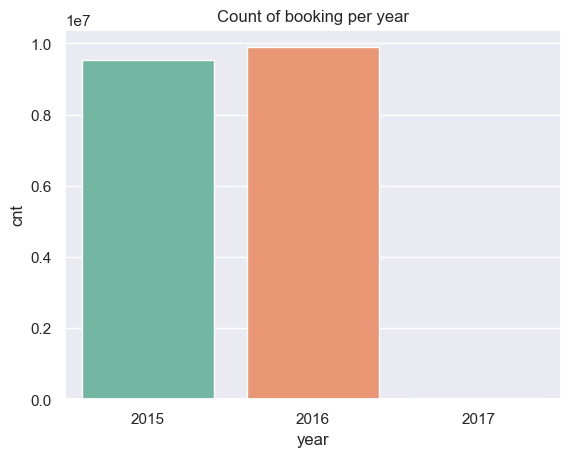

In [123]:
#count of number of bike share bookings for each year

year_data = bikes_share_df.groupby(['year'])['cnt'].sum()
year_data = year_data.reset_index()
sns.barplot(x='year',y='cnt',data=year_data, palette="Set2")
plt.title('Count of booking per year')
plt.show()

Above representation is indicative of the Count of Bike Share bookings for 2017 having low records which validates use of 2year historical data for trends analysis

In [65]:
# counting unique values in the data representing holiday / non-holiday
bikes_share_df.is_holiday.value_counts()

is_holiday
0.0    17030
1.0      384
Name: count, dtype: int64

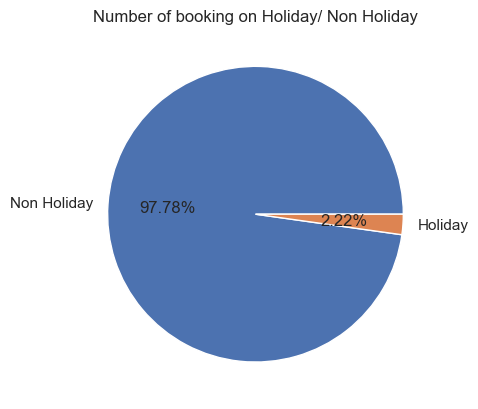

In [91]:
type_value_count = bikes_share_df['is_holiday'].value_counts(normalize=True)*100
plt.pie(type_value_count,labels=['Non Holiday','Holiday'],autopct='%1.2f%%')
plt.title('Number of booking on Holiday/ Non Holiday')
plt.show()

More booking data is from Non Holiday than a holiday

In [66]:
# counting unique values in the data representing weekend / non-weekend
bikes_share_df.is_weekend.value_counts()

is_weekend
0.0    12444
1.0     4970
Name: count, dtype: int64

More booking data is from Non-Weekend than weekends

In [67]:
# counting unique values in the season column
bikes_share_df.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

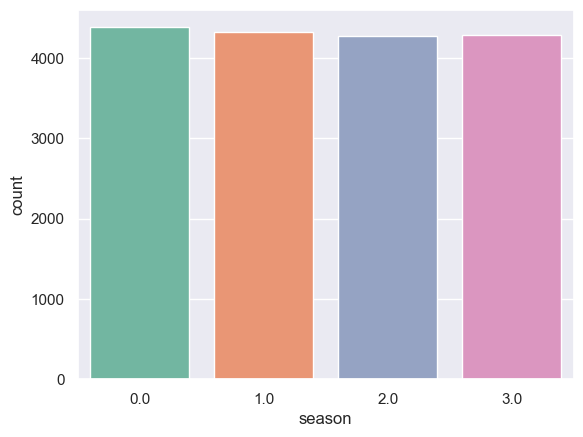

In [88]:
sns.countplot(data=bikes_share_df,x='season', palette="Set2")
plt.show()

Although number of bikes rented differ across the various seasons, all the four seasons share almost equal amount of rentals. As such it can be inferred that number of bike rentals are near to normal for all seasons.

In [68]:
# counting unique values in the weather_code column
bikes_share_df.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

From above, weather with most booking data stems from code types 1.0, followed by type2.0 and type3.0

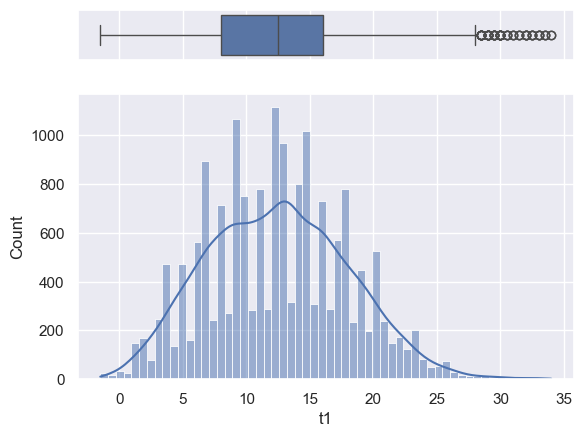

In [75]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes_share_df,x='t1', ax=ax_box)
sns.histplot(data=bikes_share_df, x="t1", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

# Univariate Analysis

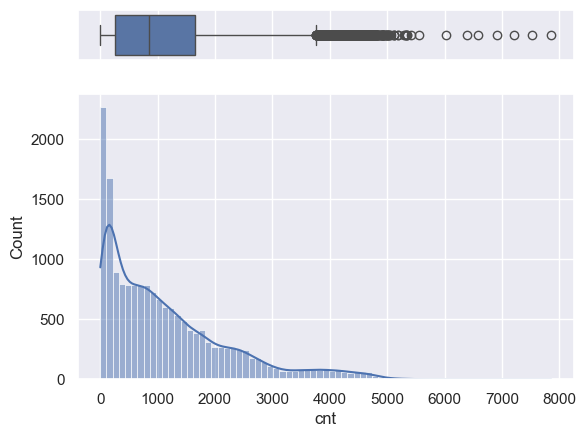

In [83]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes_share_df,x='cnt', ax=ax_box)
sns.histplot(data=bikes_share_df, x="cnt", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

Above shows there are a lot of outliers, as such cleanup process is to be applied to transform the data

# Treating Outliers

In [76]:
# Dropping weather_code 26 and 10 as they have very less number of records.

bikes_share_df = bikes_share_df[(bikes_share_df['weather_code']!=10) & (bikes_share_df['weather_code']!=26)]

In [77]:
# counting unique values in the weather_code column
bikes_share_df.weather_code.value_counts()

weather_code
1.0    6150
2.0    4034
3.0    3551
7.0    2141
4.0    1464
Name: count, dtype: int64

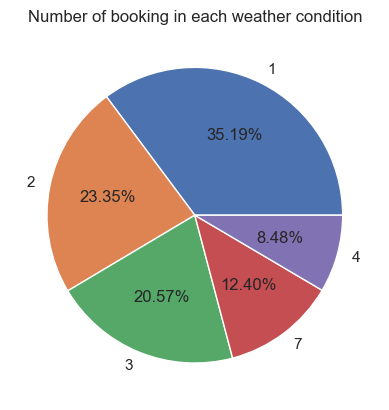

In [90]:
#Plot for booking data based on weather type

type_value_count = bikes_share_df['weather_code'].value_counts(normalize=True)*100
plt.pie(type_value_count,labels=[1,2,3,7,4],autopct='%1.2f%%')
plt.title('Number of booking in each weather condition')
plt.show()

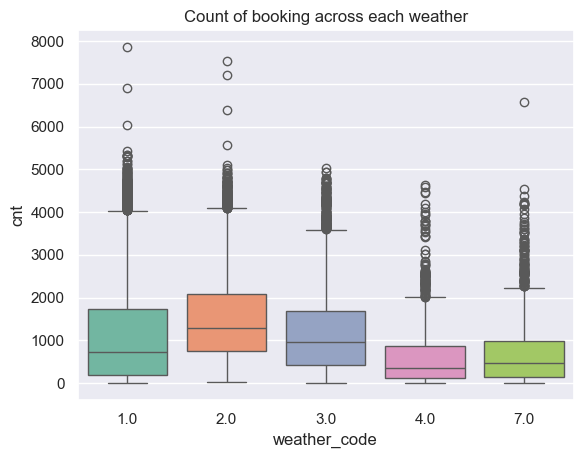

In [100]:
sns.boxplot(y='cnt',x='weather_code',data=bikes_share_df, palette="Set2")
plt.title('Count of booking across each weather')
plt.show()

From above graph we can infer that:

    Most count of booking came from weather 2.0.
    weather 1.0 sees less number of count of booking.

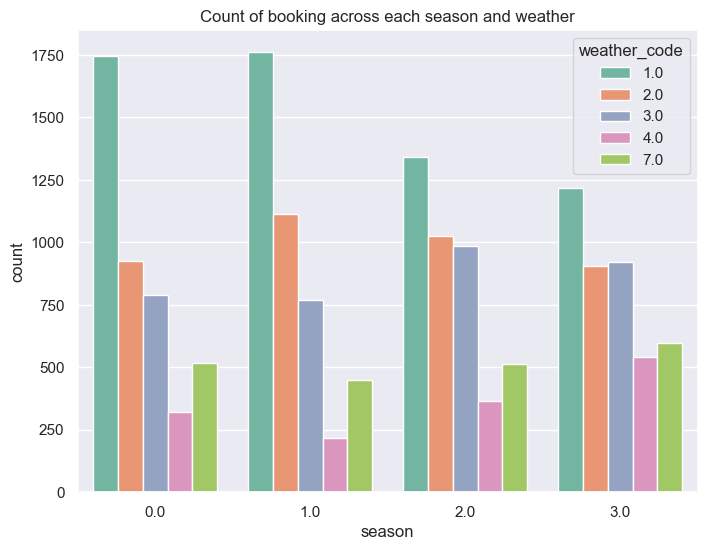

In [155]:
#Booking across weather and season

plt.figure(figsize=(8,6))
sns.countplot(x='season',hue='weather_code',data=bikes_share_df, palette="Set2")
plt.title('Count of booking across each season and weather')
plt.show()

From above graph we can infer that although almost all weather conditions are same across the seasons; Weather 1,2 and 3 sees more booking compared to Weather 4 and 7 across all seasons

In [78]:
Q3 = bikes_share_df['t1'].quantile(0.75)
Q1 = bikes_share_df['t1'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(28.0, -4.0)

In [79]:
bikes_share_df = bikes_share_df[(bikes_share_df['t1']>lower) & (bikes_share_df['t1']<upper)]

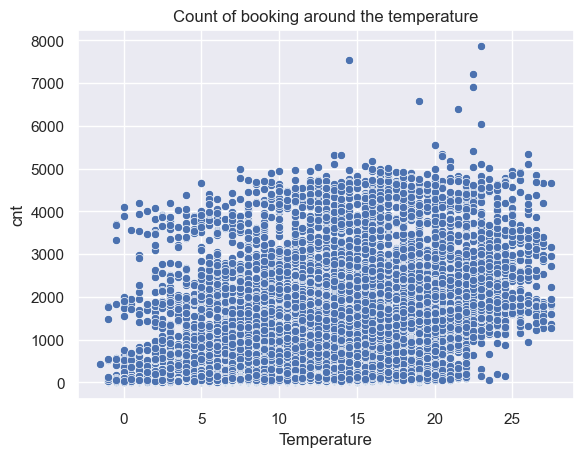

In [107]:
# Plot to check distribution after outlier treatment

sns.scatterplot(x='t1',y='cnt',data=bikes_share_df)
plt.title('Count of booking around the temperature')
plt.xlabel('Temperature')
plt.show()

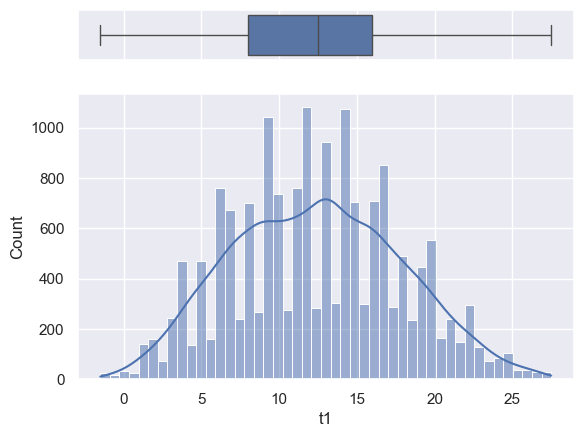

In [94]:
# Plotting graph to check distribution after outlier treatment

sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes_share_df,x='t1', ax=ax_box)
sns.histplot(data=bikes_share_df, x="t1", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

From above graphs, there is a uniform distribution of count of booking across all the temperature.  Also, we can infer that the Average real temperature is around 13° celcius with 25% of temperature around 9.5° celcius and 75% of temperature is around 15.5° celcius

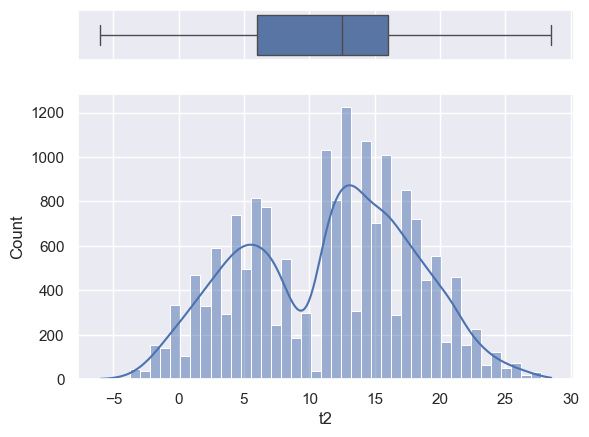

In [95]:
#checking the distribution for the "feels like" average temperature

sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes_share_df,x='t2', ax=ax_box)
sns.histplot(data=bikes_share_df, x="t2", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

From above graph, we can infer that the distribution is uniform. Also, average "feels like" temperature is around 13° celcius with 25% of feels-like temperature around 5° celcius and 75% within 15.5° celcius

In [92]:
#Determining average wind speed factors

Q3 = bikes_share_df['wind_speed'].quantile(0.75)
Q1 = bikes_share_df['wind_speed'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(36.25, -5.75)

In [93]:
bikes_share_df = bikes_share_df[(bikes_share_df['wind_speed']>lower) & (bikes_share_df['wind_speed']<upper)]

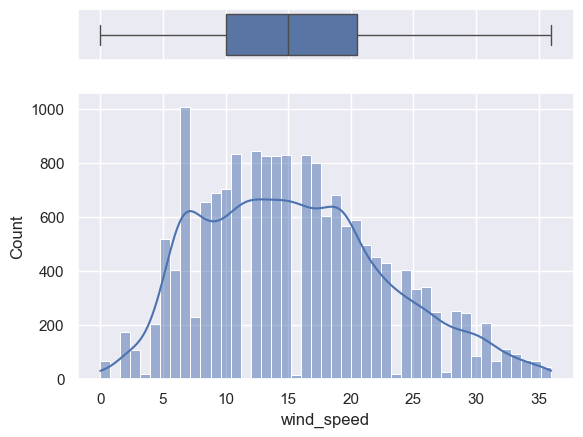

In [96]:
#checking the distribution for the average wind speed

sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes_share_df,x='wind_speed', ax=ax_box)
sns.histplot(data=bikes_share_df, x="wind_speed", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

From above graph, we can infer that wind speed in typically in the range of 0 to 35 km/h with an average wind speed of 15 km/h and 25% being under 12km/h and 75% of wind speed being under 19 km/h

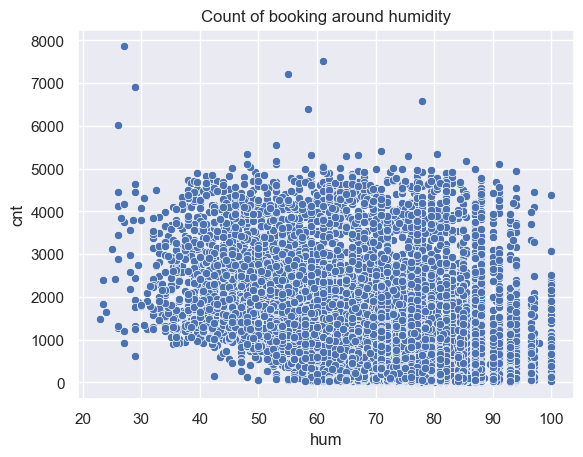

In [111]:
#checking for distribution around humidity factors shows there is higher booking when humidity is less
sns.scatterplot(x='hum',y='cnt',data=bikes_share_df)
plt.title('Count of booking around humidity')
plt.show()

# Hypothesis Testing

### Question - Does holiday have an effect on the number of bike shares rented?

In [147]:
#Decribing a fuction to yield result on the basis of given significance value - 0.05

def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS')

#Null hypothesis, H0 : There is no effect of holiday on the bikes rented.
#Alternate hypothesis, Ha : There is some effect of holiday on bikes rented.

In [157]:
# Performing t-test to know if basic assumptions met

working = bikes_share_df[bikes_share_df['is_holiday']==0]
not_working = bikes_share_df[bikes_share_df['is_holiday']==1]

t_test = stats.ttest_ind(working['cnt'], not_working['cnt'])
p_value = t_test.pvalue
print("P-value :",p_value)

P-value : 2.2024072625489108e-10


In [158]:
htResult(p_value)

Reject NULL HYPOTHESIS


We reject Null Hypothesis, which means holiday has effect on bikes rented.

# Converting dataframe to excel for visualization of transformed data in Tableau

In [163]:
# renaming columns for dictionary to identify columns and measures
columns_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

bikes_share_df.rename(columns_dict, axis=1, inplace=True)

In [164]:
# converting humidity values to percentage (i.e. a value between 0 and 1)
bikes_share_df.humidity_percent = bikes_share_df.humidity_percent / 100

In [165]:
#View applied changes to column names and dataset
bikes_share_df

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,3.0,0.0,0.0,3.0,2017,1
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,4.0,0.0,0.0,3.0,2017,1
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,4.0,0.0,0.0,3.0,2017,1
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,4.0,0.0,0.0,3.0,2017,1


In [166]:
# changing the seasons column data type to string
bikes_share_df.season = bikes_share_df.season.astype('str')

# creating a season dictionary to map the unique integers 0-3 to the actual data values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# mapping the values 0-3 to the actual written seasons
bikes_share_df.season = bikes_share_df.season.map(season_dict)

In [167]:
# changing the weather column data type to string
bikes_share_df.weather = bikes_share_df.weather.astype('str')

# creating a weather dictionary to map the unique integer values to the actual data values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# mapping the values to the actual written weathers
bikes_share_df.weather = bikes_share_df.weather.map(weather_dict)

In [168]:
# checking our dataframe to validate that column mappings worked
bikes_share_df.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,2015,1


In [169]:
# export dataframe to excel file for Tableau visualisations. 
bikes_share_df.to_excel('bikes_share_london.xlsx', sheet_name='Data')

#Excel file named as 'bikes_share_london.xlsx' with sheet name as 'Data'